In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.data import get_baseline
import rubin_sim.maf as maf
import sqlite3
import pandas as pd
import os

In [2]:
#baseline_file = get_baseline()
#baseline_file = '/Users/yoachim/runs31/ender/ender_a1_v3.1_10yrs.db'
#baseline_file = '/Users/yoachim/runs32/near_sun/near_sun_fdw_3.00_v3.2_10yrs.db'

baseline_file = '/Users/yoachim/runs32/baseline/baseline_v3.2_10yrs.db'


run_name = os.path.basename(baseline_file.replace('.db', ''))

In [10]:
bundle_list = []
ra_plots = [maf.plots.HealpixSkyMap()]
aa_plots = [maf.plots.LambertSkyMap()]

years = np.arange(0,365.25*11, 365.25)[1:]

sqls = ['filter="r" and night < %f and note not like "%%DD%%" and note not like "%%twilight%%"' % day for day in years]

for sql in sqls:
    slicer = maf.HealpixSlicer()
    metric = maf.CountMetric(col='night', units='#', metric_name=sql)
    
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plot_funcs=ra_plots,run_name=run_name))
    
    

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


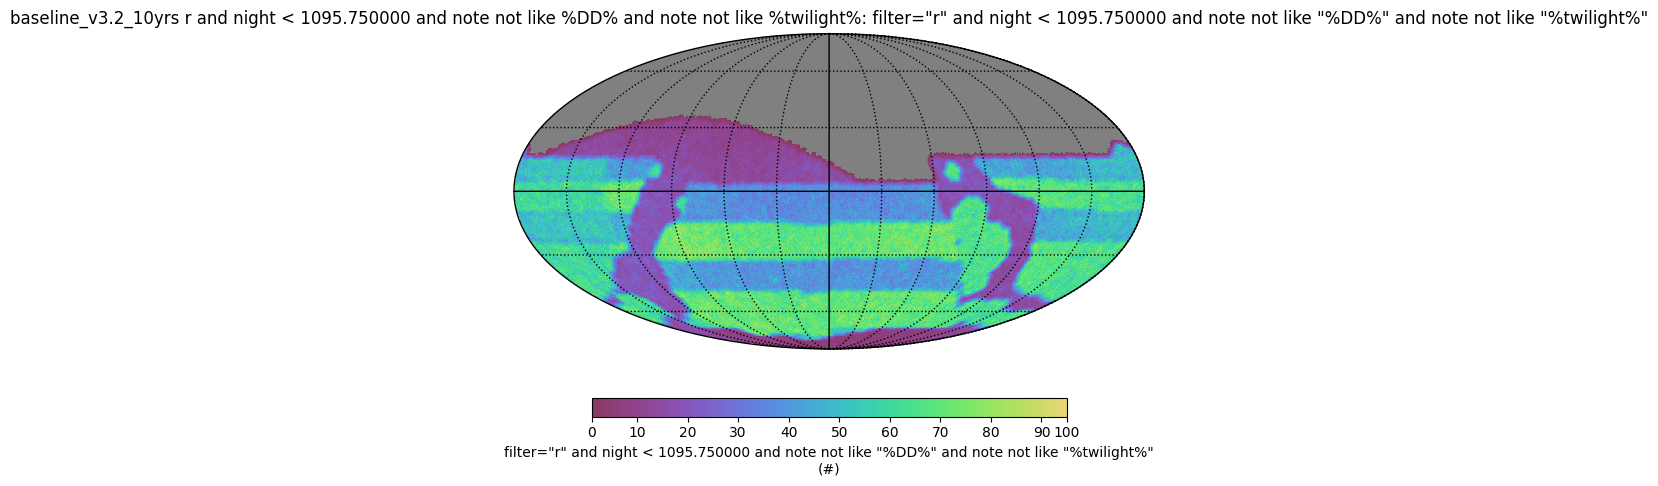

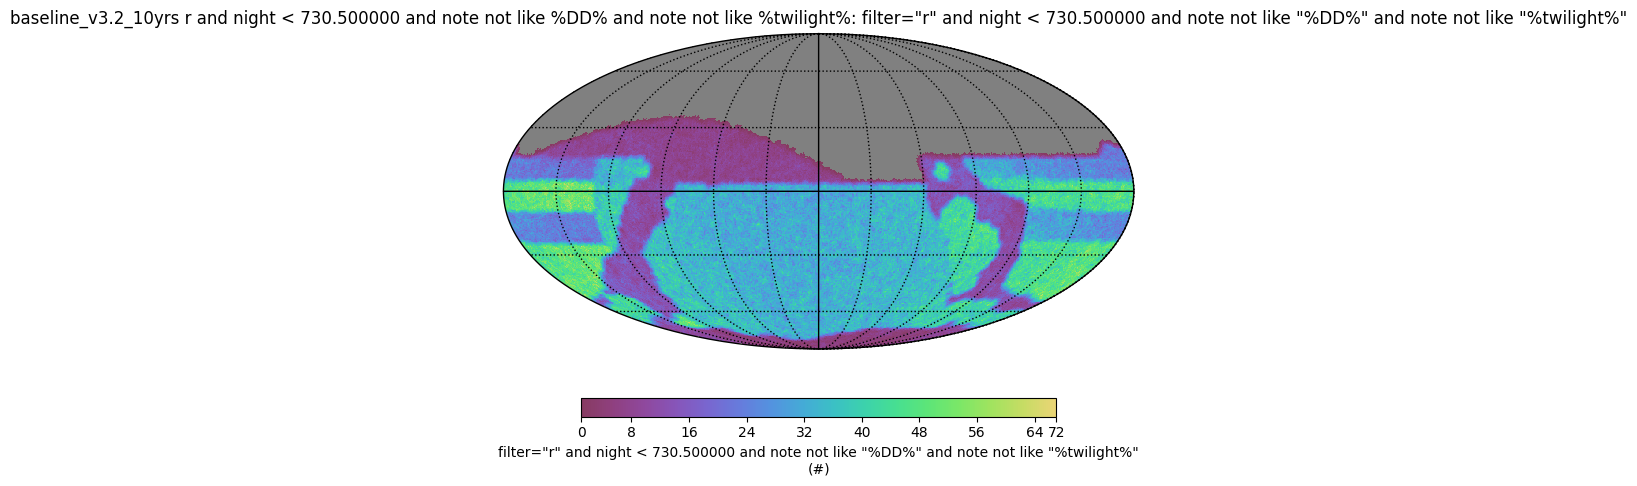

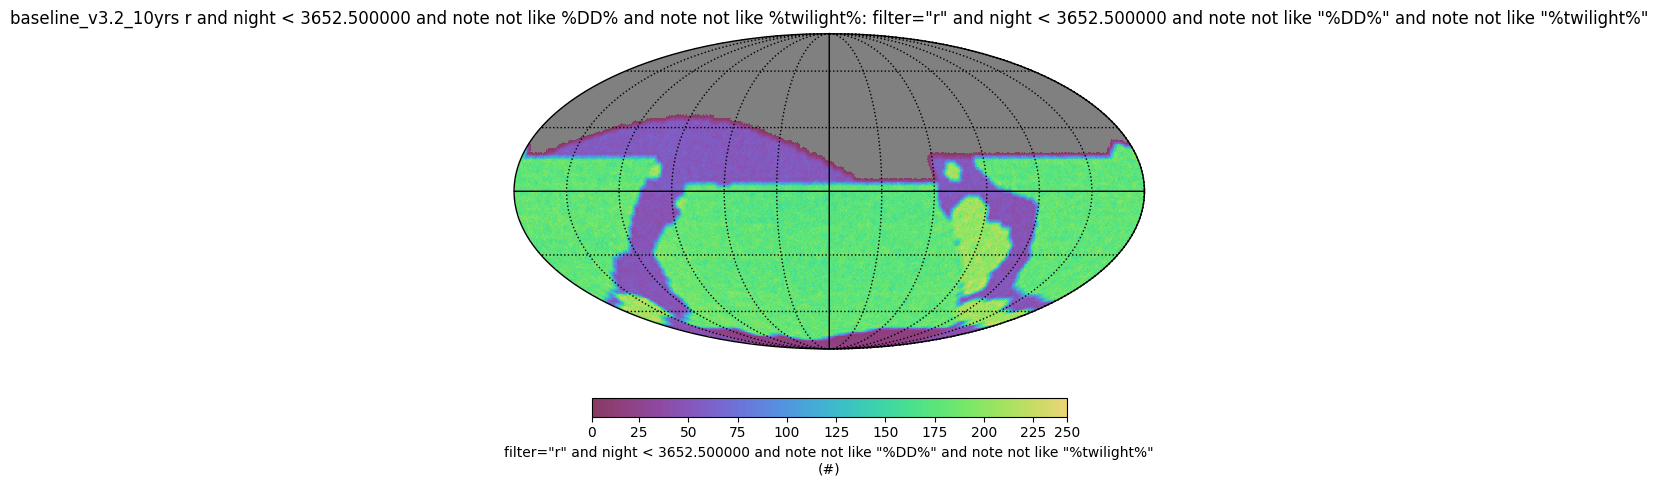

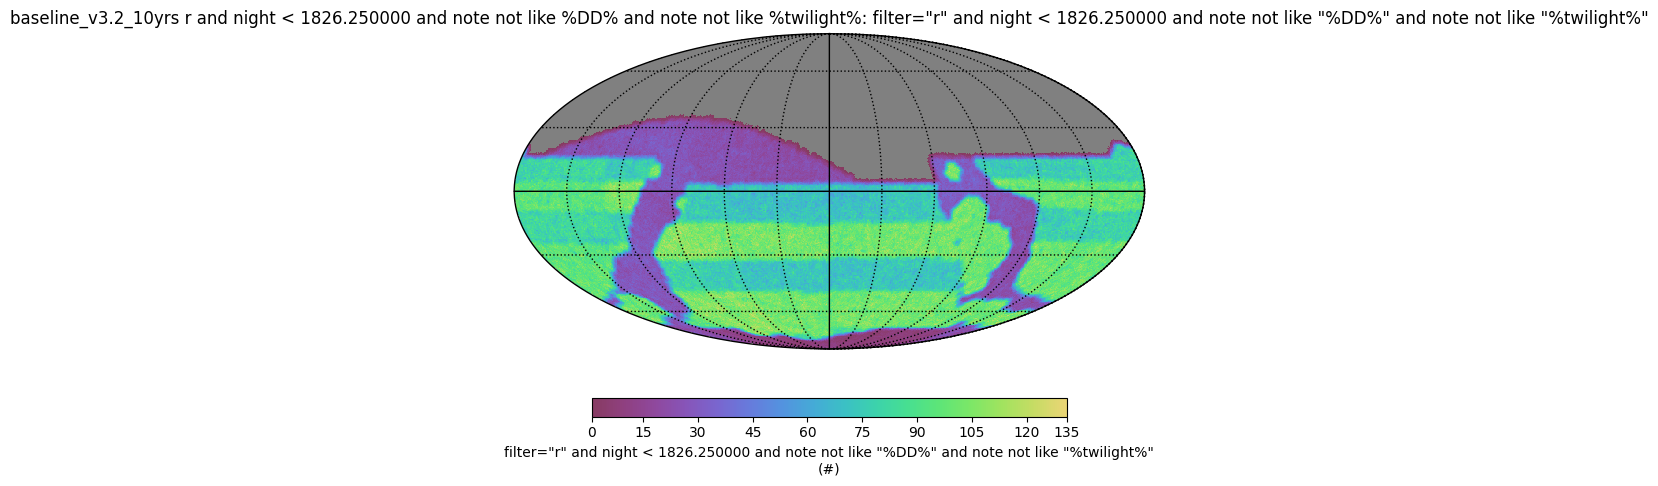

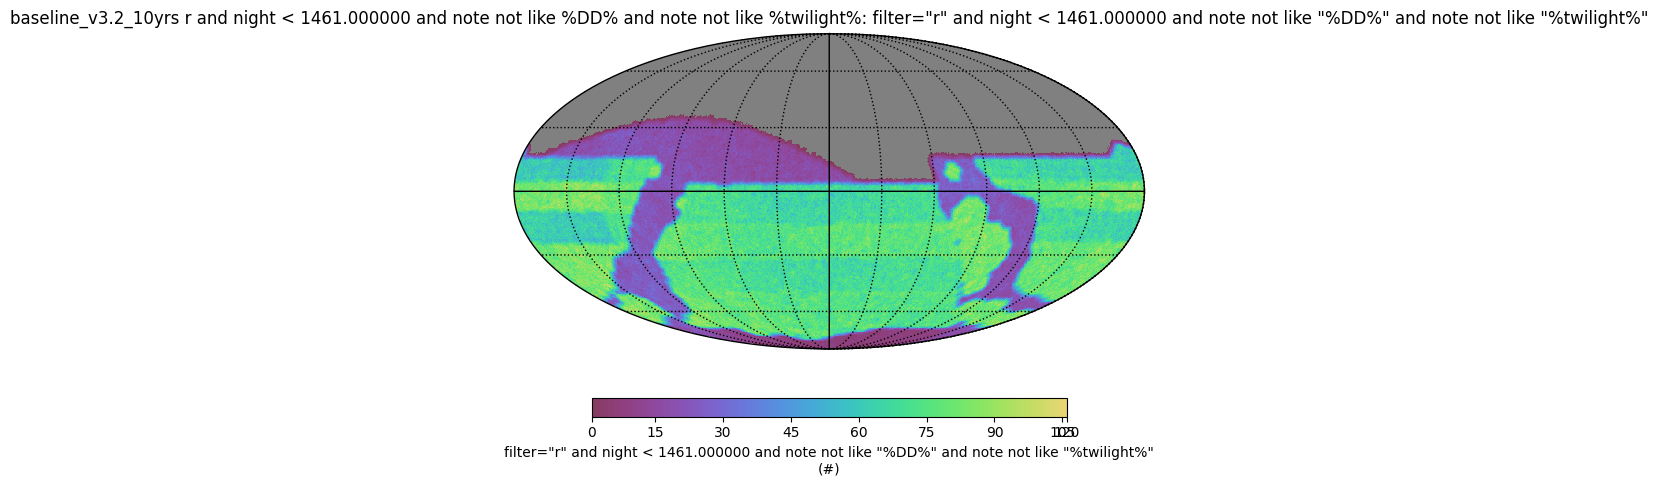

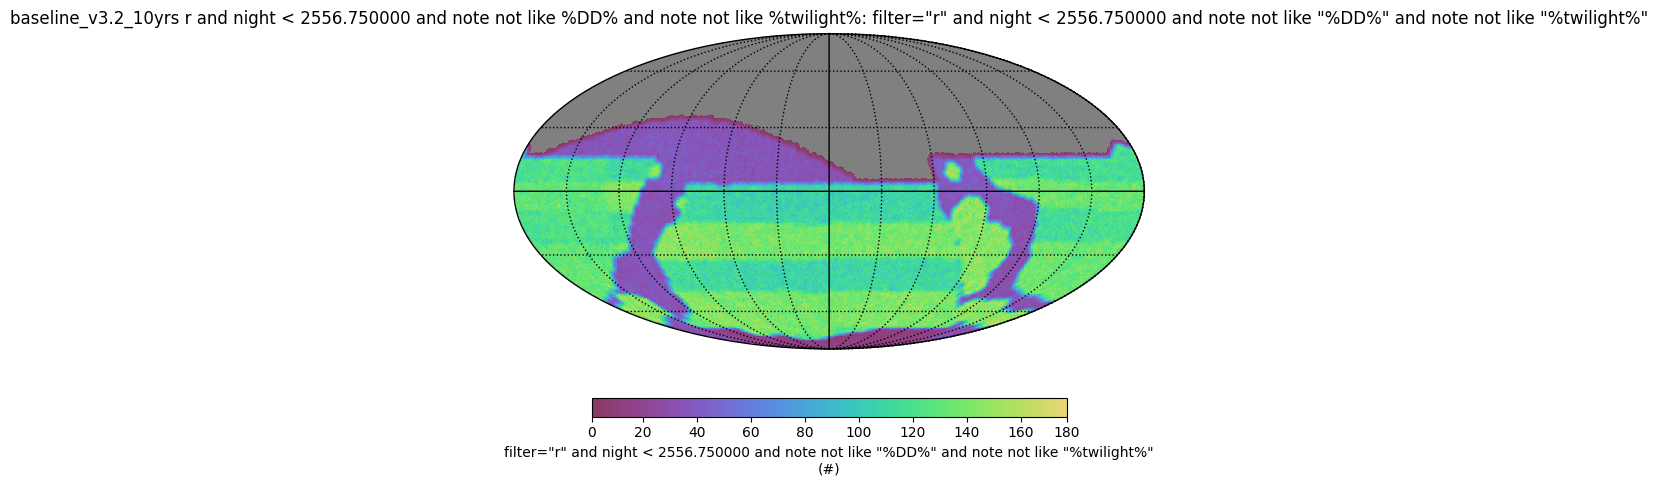

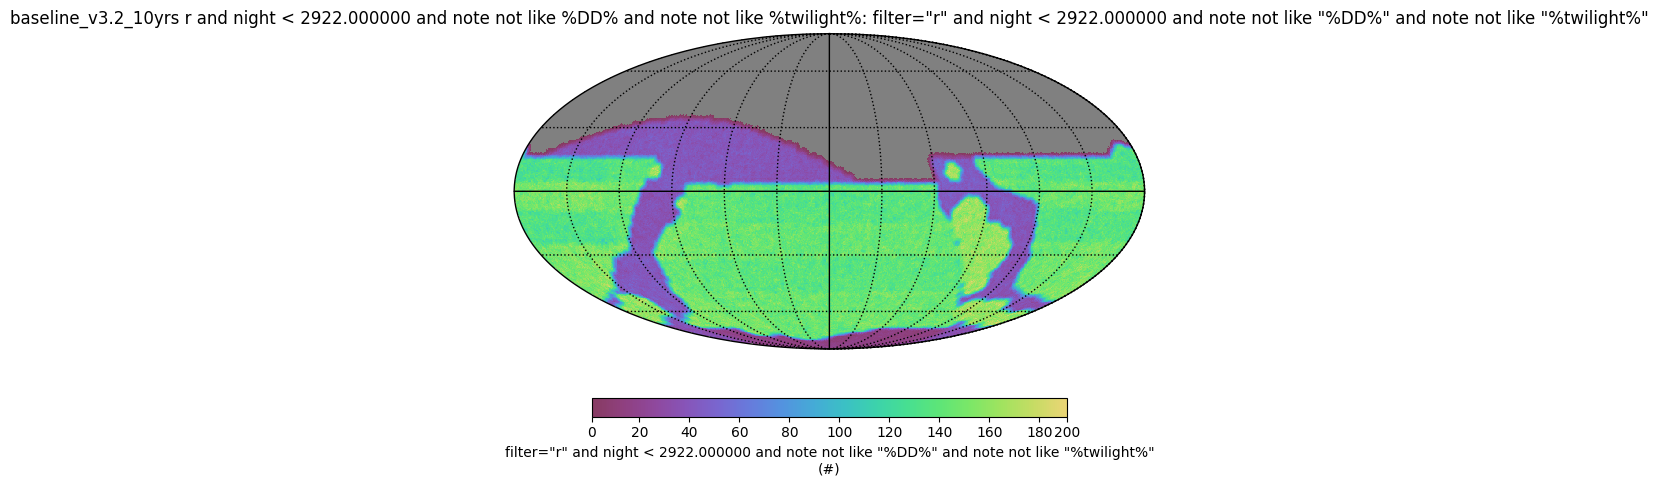

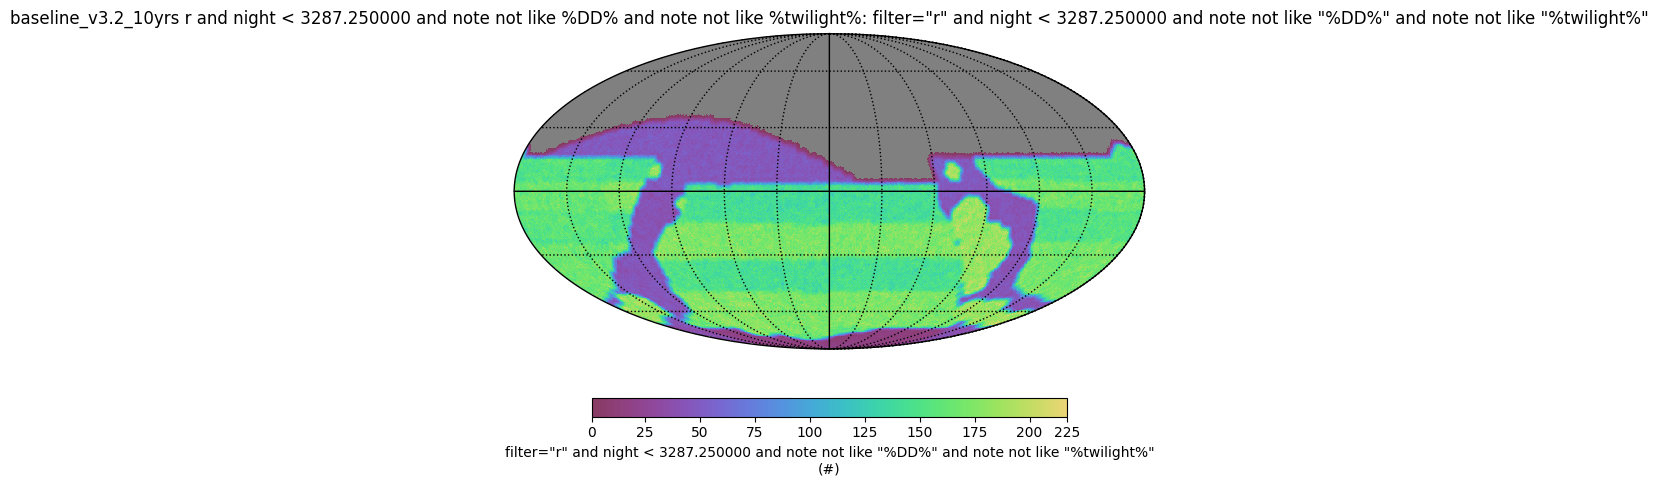

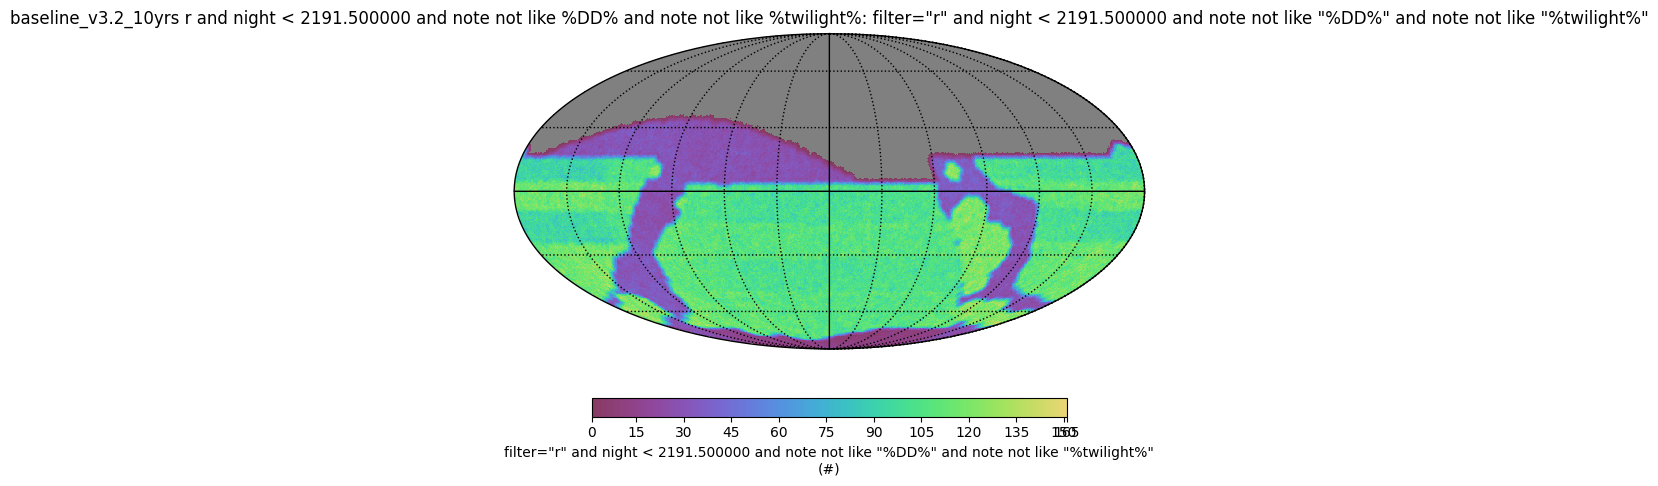

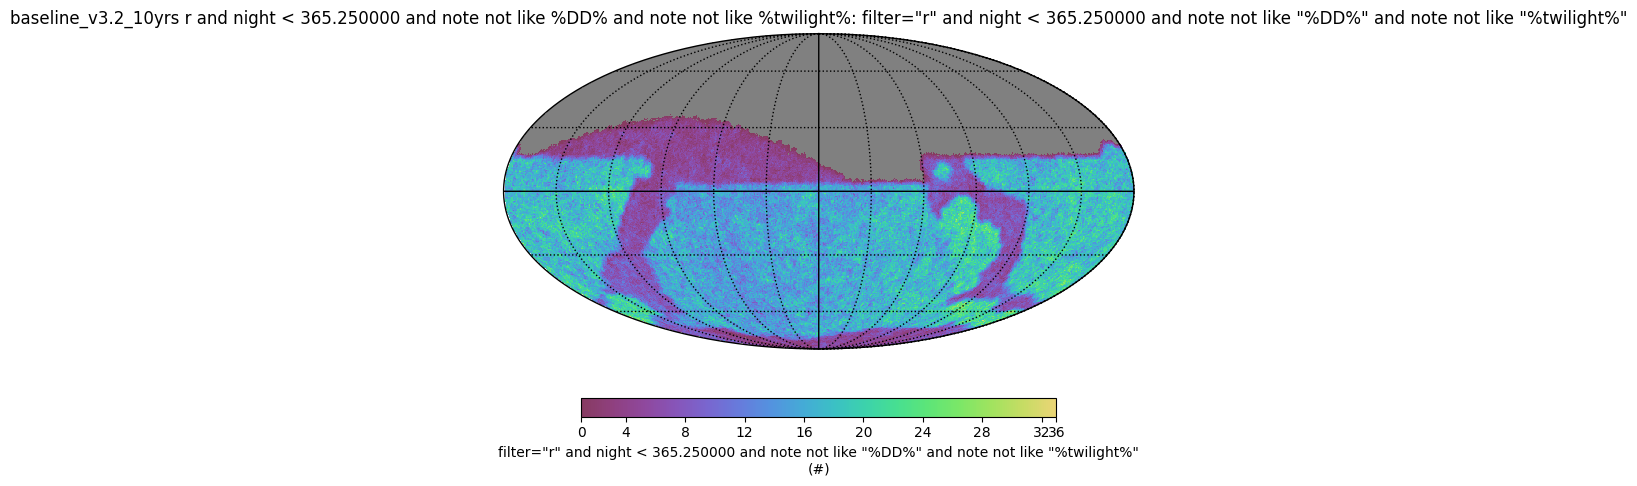

In [11]:
bd = maf.make_bundles_dict_from_list(bundle_list)
mbg = maf.MetricBundleGroup(bd, baseline_file, 'temp')
mbg.run_all()
mbg.plot_all(closefigs=False)